# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## BASE

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | turukhansk
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | yar-sale
Processing Record 4 of Set 1 | ginda
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | maloy
Processing Record 9 of Set 1 | krasnoselkup
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | chase
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | santiago
Processing Record 18 of Set 1 | hambantota
Processing Record 19 of Set 1 | atbasar
Processing Record 20 of Set 1 | taltal
Processing Record 21 of Set 1 | broome
Processing Record 22 of Set 1 | kavieng
Processing Record 23 of Set 1 | jackson
Pr

City not found. Skipping...
Processing Record 39 of Set 4 | isabela
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | buala
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | itaituba
Processing Record 45 of Set 4 | tidore
City not found. Skipping...
Processing Record 46 of Set 4 | poum
Processing Record 47 of Set 4 | zolotinka
City not found. Skipping...
Processing Record 48 of Set 4 | shishou
Processing Record 49 of Set 4 | farsund
Processing Record 0 of Set 5 | baza
Processing Record 1 of Set 5 | kita
Processing Record 2 of Set 5 | guiglo
Processing Record 3 of Set 5 | galle
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | leningradskiy
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | rumonge
Processing Record 9 of Set 5 | kaya
Processing Record 10 of Set 5 | krasnyy chikoy
Processing R

Processing Record 28 of Set 8 | san andres
Processing Record 29 of Set 8 | ixtapa
Processing Record 30 of Set 8 | avera
Processing Record 31 of Set 8 | verkhniy baskunchak
Processing Record 32 of Set 8 | arraial do cabo
Processing Record 33 of Set 8 | asosa
Processing Record 34 of Set 8 | moose factory
Processing Record 35 of Set 8 | marzuq
Processing Record 36 of Set 8 | asau
Processing Record 37 of Set 8 | mazyr
Processing Record 38 of Set 8 | mizdah
Processing Record 39 of Set 8 | lakes entrance
Processing Record 40 of Set 8 | norman wells
Processing Record 41 of Set 8 | carnarvon
Processing Record 42 of Set 8 | gushi
Processing Record 43 of Set 8 | northview
Processing Record 44 of Set 8 | sao francisco
Processing Record 45 of Set 8 | cauquenes
Processing Record 46 of Set 8 | cabedelo
Processing Record 47 of Set 8 | grand-santi
Processing Record 48 of Set 8 | sawakin
Processing Record 49 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 0 of Set 9 | gorontalo
Pro

Processing Record 17 of Set 12 | half moon bay
Processing Record 18 of Set 12 | farmos
Processing Record 19 of Set 12 | sussex
Processing Record 20 of Set 12 | palmer
Processing Record 21 of Set 12 | tsogni
Processing Record 22 of Set 12 | quelimane
Processing Record 23 of Set 12 | tupik
Processing Record 24 of Set 12 | sao caitano
Processing Record 25 of Set 12 | micheweni
Processing Record 26 of Set 12 | biberach
Processing Record 27 of Set 12 | leshukonskoye
Processing Record 28 of Set 12 | hermiston
Processing Record 29 of Set 12 | sayula
Processing Record 30 of Set 12 | saint-pierre
Processing Record 31 of Set 12 | turan
Processing Record 32 of Set 12 | lira
Processing Record 33 of Set 12 | taos
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Set 12 | kudahuvadhoo
Processing Record 36 of Set 12 | toora-khem
Processing Record 37 of Set 12 | sines
Processing Record 38 of Set 12 | sikonge
Processing Record 39 of Set 12 | kushiro
Processing Record 40 of Set 12 | tha

## Generate Cities List

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Passing the data into a DataFrame to work with

all_cities_df=pd.DataFrame(city_data)

In [5]:
# Showing the output

all_cities_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-16.71,85,2,6.85,RU,1615434716
1,kodiak,57.7900,-152.4072,33.80,47,1,23.02,US,1615434716
2,yar-sale,66.8333,70.8333,-28.25,83,0,6.98,RU,1615434717


In [6]:
# Exporting the data to a CSV file...

all_cities_df.to_csv("../Output/all_cities_df.csv", index=False, header=True)

In [7]:
print (f"There is a total of {len(all_cities_df)} displayed cities in the data frame.")

There is a total of 563 displayed cities in the data frame.


In [8]:
# Inspect the data and remove the cities where the humidity > 100%.

filtered_cities=all_cities_df[all_cities_df['Humidity']<=100]
filtered_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-16.71,85,2,6.85,RU,1615434716
1,kodiak,57.7900,-152.4072,33.80,47,1,23.02,US,1615434716
2,yar-sale,66.8333,70.8333,-28.25,83,0,6.98,RU,1615434717
3,ginda,30.6945,78.4932,68.00,56,0,3.44,IN,1615434717
4,mount isa,-20.7333,139.5000,89.60,45,75,6.91,AU,1615434717


In [9]:
filtered_cities.rename(columns={'Lat':'Latitude','Lng': 'Longitude','Max Temp': 'Maximum Temperature'})
filtered_cities.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-16.71,85,2,6.85,RU,1615434716
1,kodiak,57.7900,-152.4072,33.80,47,1,23.02,US,1615434716
2,yar-sale,66.8333,70.8333,-28.25,83,0,6.98,RU,1615434717


In [10]:
print(f'There are {len(filtered_cities)} cities within the range of 0 to 100 percent of humidity in the dataframe.')

There are 563 cities within the range of 0 to 100 percent of humidity in the dataframe.


In [11]:
#  Get the indices of cities that have humidity over 100%.

high_humidity=all_cities_df.loc[all_cities_df['Humidity']>100]
print(f'There are {len(high_humidity)} cities with over 100% in the dataset.')


There are 0 cities with over 100% in the dataset.


In [12]:
#  Get the indices of cities that have humidity over 100%.

high_humidity_index=high_humidity.index
high_humidity_index

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_cities_df=all_cities_df.drop(high_humidity_index, inplace=False)
clean_cities_df=clean_cities_df.rename(columns={'Lat':'Latitude','Lng': 'Longitude','Max Temp': 'Maximum Temperature'})
clean_cities_df.head(3)

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,turukhansk,65.8167,87.9833,-16.71,85,2,6.85,RU,1615434716
1,kodiak,57.7900,-152.4072,33.80,47,1,23.02,US,1615434716
2,yar-sale,66.8333,70.8333,-28.25,83,0,6.98,RU,1615434717


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

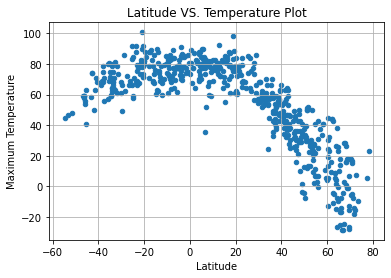

In [14]:
# Latitude VS. Temperature Plot: Pandas Method

lat_temp_plot=clean_cities_df.plot(kind="scatter",x='Latitude',y='Maximum Temperature', grid=True,figsize=(6,4), title="Latitude VS. Temperature Plot").get_figure()

# Saving the graph in 'Images' folder in png format

lat_temp_plot.savefig("../Images/lat_temp_plotA.png")

What this scatter plot is showing us is the relation that Latitude and Temperature have with each other in our Cities Database.

This is telling us the next:

1. By having lower or negative values in our Temperature Axis, means that cities will also tend to have a higher latitude.
2. By having higher values in our Temperature Axis, means that cities will tend to have a lower latitude or being closer to the equator.
3. There is a strong correlation between the 2 variables analyzed in the plot.

## Latitude vs. Humidity Plot

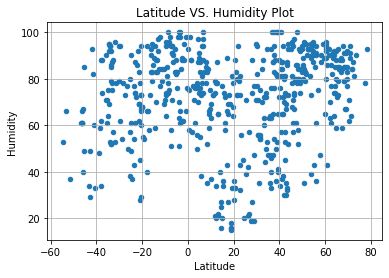

In [15]:
# Latitude VS. Humidity Plot: Pandas Method

lat_humid_plot=clean_cities_df.plot(kind="scatter",x='Latitude',y='Humidity', grid=True,figsize=(6,4), title="Latitude VS. Humidity Plot").get_figure()

# Saving the graph in 'Images' folder in png format

lat_humid_plot.savefig("../Images/lat_humid_plotA.png")

What this scatter plot is showing us is the relation that Latitude and Humidity have with each other in our Cities Database.

This is telling us the next:

1. There is a trend that cities below 0 latitude have higher humidity indexes.
2. There is another trend that cities above 0 latitude have a more diverse humidity indexes.

## Latitude vs. Cloudiness Plot

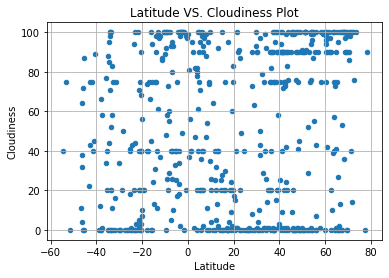

In [16]:
# Latitude VS. Cloudiness Plot: Pandas Method

lat_cloud_plot=clean_cities_df.plot(kind="scatter",x='Latitude',y='Cloudiness', grid=True,figsize=(6,4), title="Latitude VS. Cloudiness Plot").get_figure()

# Saving the graph in 'Images' folder in png format

lat_cloud_plot.savefig("../Images/lat_cloud_plotA.png")

What this scatter plot is showing us is the relation that Latitude and Cloudiness have with each other in our Cities Database.

This is telling us the next:

1. What we can get from the plot is that cities tend to have cloudiness wether they have a low or high altitude.
2. Point 1 also applies wether there are negative or positive points in latitude.

## Latitude vs. Wind Speed Plot

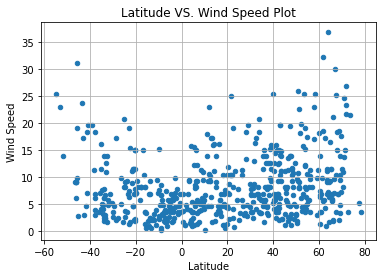

In [17]:
# Latitude VS. Wind Speed Plot: Pandas Method

lat_wind_plot=clean_cities_df.plot(kind="scatter",x='Latitude',y='Wind Speed', grid=True,figsize=(6,4), title="Latitude VS. Wind Speed Plot").get_figure()

# Saving the graph in 'Images' folder in png format

lat_wind_plot.savefig("../Images/lat_wind_plotA.png")

What this scatter plot is showing us is the relation that Latitude and Wind Speed have with each other in our Cities Database.

This is telling us the next:

1. What we get from the plot is that all cities, despite having a low or high altitude, have Wind Speeds ranging around 0 to 20 mph.
2. Also a thing to notice is that the majority of cities are in some point between -40 to 75 in the Latitude axis.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

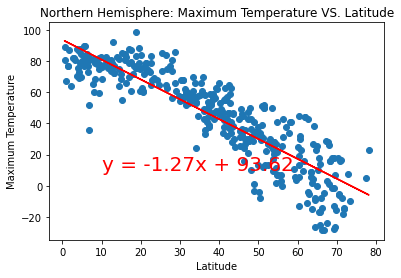

The r value of this linear regression is: -0.88.


In [18]:
# Linear Regression: Northern Hemisphere- Maximum Temperature VS. Latitude

# Specifying which cities to work with by establishing the Northern Hemisphere
northern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']>=0]

latitude=northern_cities_df['Latitude'] # X Value
max_temp=northern_cities_df['Maximum Temperature'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,max_temp)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=20,color="red")

plt.scatter(latitude,max_temp)
plt.title('Northern Hemisphere: Maximum Temperature VS. Latitude')
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/north_temp_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')


What this scatter plot with linear regression is showing us is the relation that Latitude and Maximum Temperature have with each other in our Cities Database.

This is telling us the next: 
1. There is a direct and strong correlation between the two variables.
2. With a higher latitude results in having lower temperatures.
3. With a lower latitude results in having a higher temperature.
4. The r value with -0.88 means that there is a strong correlation between the two variables.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

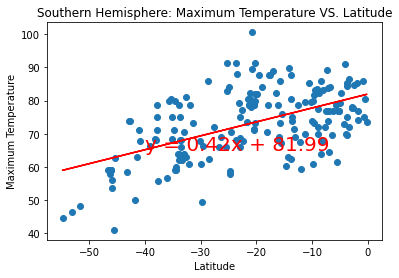

The r value of this linear regression is: 0.55.


In [19]:
# Linear Regression: Southern Hemisphere- Maximum Temperature VS. Latitude

# Specifying which cities to work with by establishing the Southern Hemisphere
southern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']<0]

latitude=southern_cities_df['Latitude'] # X Value
max_temp=southern_cities_df['Maximum Temperature'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,max_temp)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-40,65),fontsize=20,color="red")

plt.scatter(latitude,max_temp) ##CHANGE TITLES HERE
plt.title('Southern Hemisphere: Maximum Temperature VS. Latitude')
plt.ylabel('Maximum Temperature')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/south_temp_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Maximum Temperature have with each other specifically in cities in the Southern Hemisphere.

This is telling us the next: 

1. There is a direct correlation between the two variables, although not a strong one with an r value of 0.55.
2. With a latitude coming closer to 0, results in having higher temperatures.
3. With a lower latitude, moving away from 0, results in having a lower temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

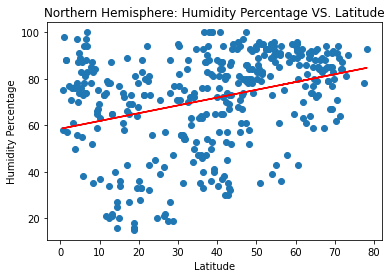

The r value of this linear regression is: 0.33.


In [20]:
# Linear Regression: Northern Hemisphere- Humidity (%) VS. Latitude

# Specifying which cities to work with by establishing the Northern Hemisphere
northern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']>=0]

latitude=northern_cities_df['Latitude'] # X Value
humidity=northern_cities_df['Humidity'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,humidity)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=20,color="red")

plt.scatter(latitude,humidity)
plt.title('Northern Hemisphere: Humidity Percentage VS. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/north_humid_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Humidity Percentage have with each other specifically in cities in the Northern Hemisphere.

This is telling us the next: 

1. There is a direct correlation between the two variables, although not a strong one.
2. With a latitude moving away from 0, results in having higher humidity percentages.
3. With a lower latitude, results in having a more diverse division of humidity percentages between 0 and 100 percent.
4. The r value is 0.33, meaning there is a correlation between the two variables although not a strong one.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

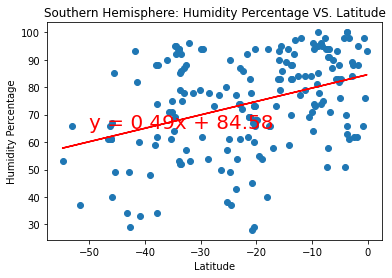

The r value of this linear regression is: 0.38.


In [21]:
# Linear Regression: Southern Hemisphere- Humidity (%) VS. Latitude

# Specifying which cities to work with by establishing the Southern Hemisphere
southern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']<0]

latitude=southern_cities_df['Latitude'] # X Value
humidity=southern_cities_df['Humidity'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,humidity)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=20,color="red")

plt.scatter(latitude,humidity)
plt.title('Southern Hemisphere: Humidity Percentage VS. Latitude')
plt.ylabel('Humidity Percentage')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/south_humid_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Humidity Percentage have with each other specifically in cities in the Southern Hemisphere.

This is telling us the next: 

1. There is a direct correlation between the two variables, although a weak one with an r value of 0.38.
2. With a latitude coming closer to 0, results in having higher humidity percentages.
3. With a lower latitude, results in having almost no humidity in those cities. while coming closer to 0 in latitude means having high humidity percentages.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

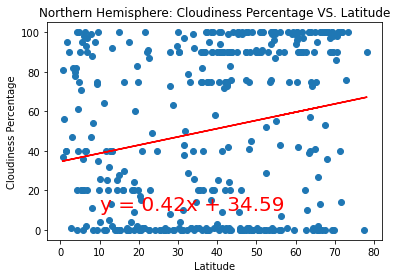

The r value of this linear regression is: 0.21.


In [22]:
# Linear Regression: Northern Hemisphere- Cloudiness (%) VS. Latitude

# Specifying which cities to work with by establishing the Northern Hemisphere
northern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']>=0]

latitude=northern_cities_df['Latitude'] # X Value
cloudiness=northern_cities_df['Cloudiness'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,cloudiness)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=20,color="red")

plt.scatter(latitude,cloudiness)
plt.title('Northern Hemisphere: Cloudiness Percentage VS. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/north_cloud_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Cloudiness Percentage have with each other specifically in cities in the Northern Hemisphere.

This is telling us the next: 

1. There is a direct correlation between the two variables, although a weak one with an r value of 0.21.
2. With a latitude in the range 50 and 70, results in having higher cludiness percentages.
3. With a latitude in the range of 10 and 50, results in having low cloudiness percentages.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

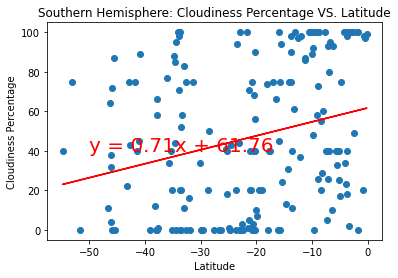

The r value of this linear regression is: 0.26.


In [23]:
# Linear Regression: Southern Hemisphere- Cloudiness (%) VS. Latitude

# Specifying which cities to work with by establishing the Southern Hemisphere
southern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']<0]

latitude=southern_cities_df['Latitude'] # X Value
cloudiness=southern_cities_df['Cloudiness'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,cloudiness)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=20,color="red")

plt.scatter(latitude,cloudiness)
plt.title('Southern Hemisphere: Cloudiness Percentage VS. Latitude')
plt.ylabel('Cloudiness Percentage')
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/south_cloud_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Cloudiness Percentage have with each other specifically in cities in the Southern Hemisphere.

This is telling us the next: 

1. There is a correlation between the two variables, although a very weak one (r = 0.26) to be able to make further analysis.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

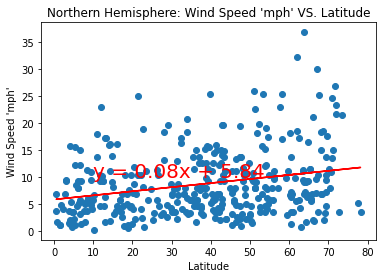

The r value of this linear regression is: 0.26.


In [24]:
# Linear Regression: Northern Hemisphere- Wind Speed (mph) VS. Latitude

# Specifying which cities to work with by establishing the Northern Hemisphere
northern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']>=0]

latitude=northern_cities_df['Latitude'] # X Value
windspeed=northern_cities_df['Wind Speed'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,windspeed)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=20,color="red")

plt.scatter(latitude,windspeed)
plt.title("Northern Hemisphere: Wind Speed 'mph' VS. Latitude")
plt.ylabel("Wind Speed 'mph'")
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/north_wind_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Wind Speed have with each other specifically in cities in the Northern Hemisphere.

This is telling us the next: 

1. There is a correlation between the two variables, although a weak one with an r value of 0.26.
2. Windspeed is in its majority equally distributed along all cities in the plot, despite having different altitudes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

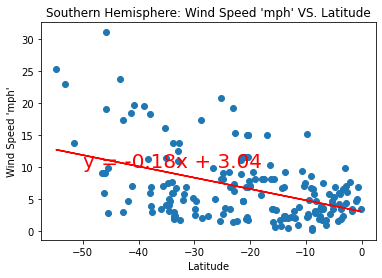

The r value of this linear regression is: -0.44.


In [25]:
# Linear Regression: Southern Hemisphere- Wind Speed (mph) VS. Latitude

# Specifying which cities to work with by establishing the Southern Hemisphere
southern_cities_df=clean_cities_df.loc[clean_cities_df['Latitude']<0]

latitude=southern_cities_df['Latitude'] # X Value
windspeed=southern_cities_df['Wind Speed'] # Y Value

(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude,windspeed)

regress_values = latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=20,color="red")

plt.scatter(latitude,windspeed)
plt.title("Southern Hemisphere: Wind Speed 'mph' VS. Latitude")
plt.ylabel("Wind Speed 'mph'")
plt.xlabel('Latitude')

# Saving the graph in 'Images' folder in png format
plt.savefig("../Images/south_wind_vs_latA.png")

plt.show()
print(f'The r value of this linear regression is: {round(rvalue,2)}.')

What this scatter plot with linear regression is showing us is the relation that Latitude and Wind Speed have with each other specifically in cities in the Southern Hemisphere.

This is telling us the next: 

1. There is a correlation between the two variables, although a weak one with an r value of -0.44.
2. We can see that the windspeed is in its majority equally distributed but theres a trend that there are more cities grouped in the ranges between 0 and 10 MPH.